In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data75815


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

__MACOSX  real_or_drawing


In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 115 kB 23.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [5]:
# !unzip data/data75815/real_or_drawing.zip -d work/

### 看看图片集长啥样

In [6]:
import matplotlib.pyplot as plt
import os
titles = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize = (18,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    fig = plt.imshow(plt.imread(f'work/real_or_drawing/train_data/{i}/{500*i + 1}.bmp'))
    plt.title(titles[i])

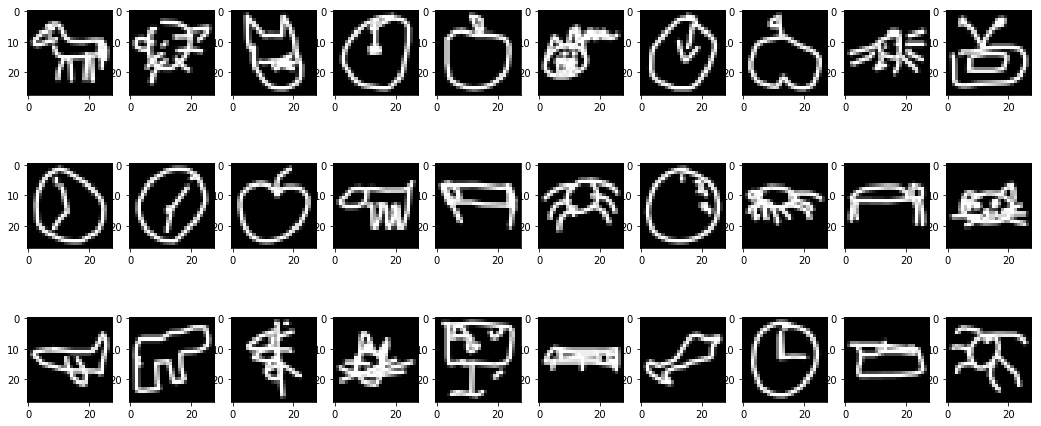

In [7]:
plt.figure(figsize = (18,8))
for i in range(30):
    plt.subplot(3,10,i+1)
    fig = plt.imshow(plt.imread(f'work/real_or_drawing/test_data/0/' + str(i).rjust(5,'0') + '.bmp'))

### 涂鸦与原物品的关系
涂鸦在这里是简单线条画出来的物体轮廓，进一步考虑到手头数据集的结构，我们对彩色位图执行边缘检测，生成轮廓的 train_data，并以此训练网络，来分辨人画的涂鸦。

边缘检测一般基于图片梯度的计算。当图片某与相邻像素颜色差异较大时，即梯度较大时，我们有理由认为这就是图片的某个物体的轮廓。

梯度的计算可以通过图片的数值矩阵与一个滑动的小卷积核实现。常见的卷积核有 Canny 算子，Sobel 算子，Prewitt 算子等。犹豫核结构的不同，他们在不同结构的轮廓下会有不同的表现。

利用 opencv 库可以方便地实现边缘检测。

In [14]:
import cv2

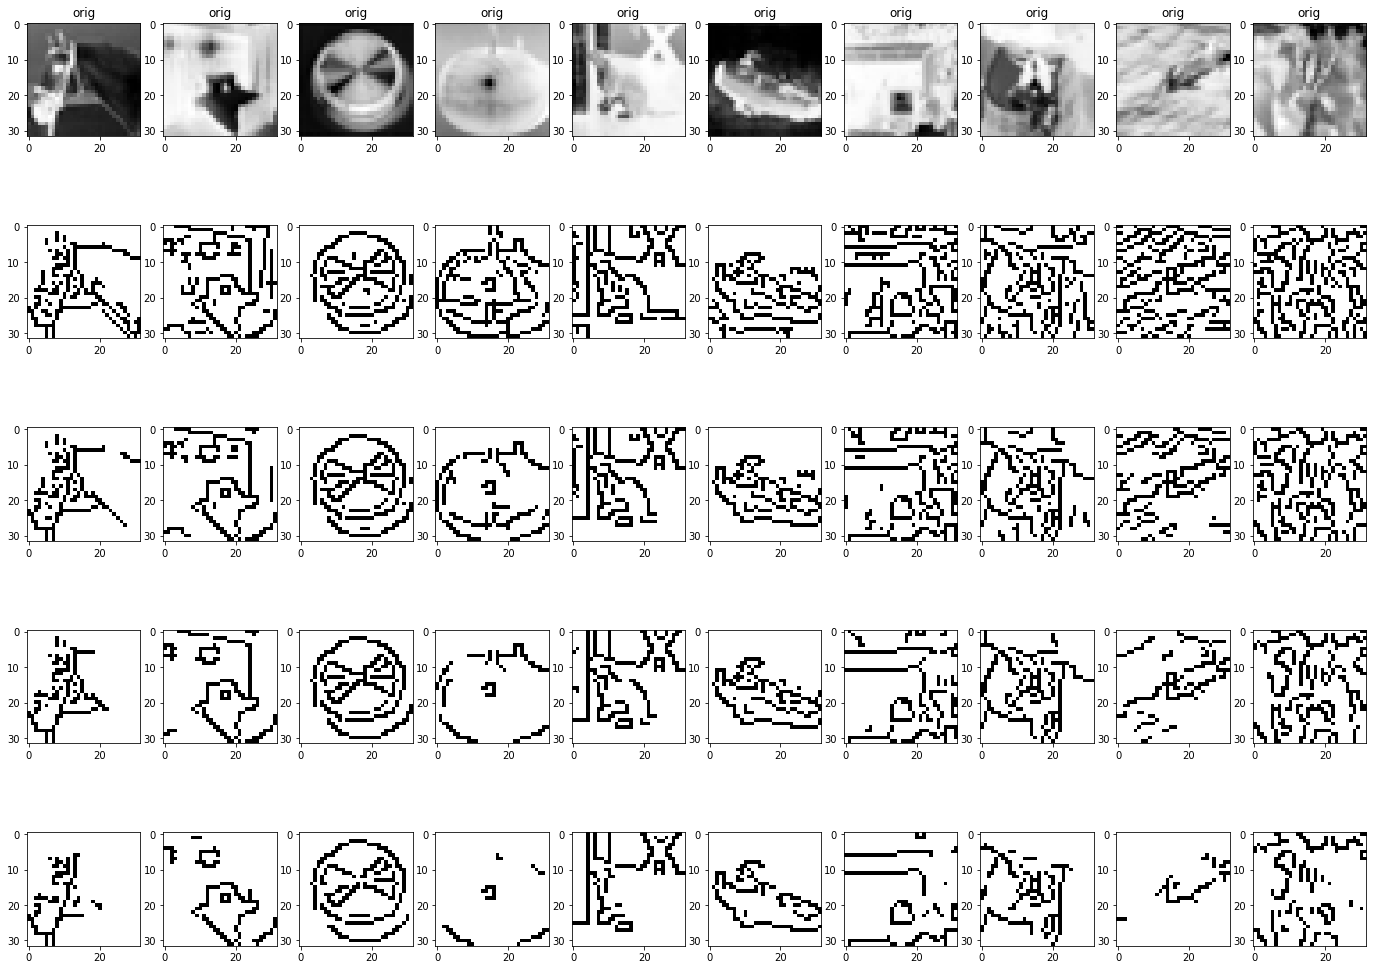

In [15]:
plt.figure(figsize = (24,18))
lbd = [50,100,150,250]
ubd = [100,150,200,300]
for i in range(10):
    orig = plt.imread(f'work/real_or_drawing/train_data/{i}/{500*i + 19}.bmp')
    gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
    for j in range(5):
        if j == 0:
            plt.subplot(5,10,1 + i + j*10)
            plt.imshow(gray,cmap = 'Greys')
            plt.title('orig')
            # print(j)
        else:
            plt.subplot(5,10,1 + i + j*10)
            plt.imshow(cv2.Canny(gray,lbd[j-1],ubd[j-1]),cmap = 'Greys')
            # print(j)

综合考虑后选择 lbd = 100, ubd = 150 的 Canny 算子。

### 数据准备/打包

In [16]:
# !mkdir work/raw

In [17]:
import numpy as np
import random

In [18]:
PATH = 'work/real_or_drawing/train_data/'
RAW_PATH = 'work/raw/'
LIST = sorted(os.listdir(PATH + str(0)))
X = np.zeros((len(LIST)*10,32,32,1),dtype = np.uint8)
Y = np.zeros((len(LIST)*10),dtype = np.int64)
for i in range(10):
    LIST = sorted(os.listdir(PATH + str(i)))
    random.shuffle(LIST)
    for j,DATA in enumerate(LIST):
        orig = plt.imread(PATH + f'{i}/' + DATA)
        gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
        X[500*i + j,:,:,0] = cv2.Canny(gray,100,150)
        Y[500*i + j] = int(i)
        if j % 100 == 0:
            print(f'category {i}, completed {j}')

category 0, completed 0
category 0, completed 100
category 0, completed 200
category 0, completed 300
category 0, completed 400
category 1, completed 0
category 1, completed 100
category 1, completed 200
category 1, completed 300
category 1, completed 400
category 2, completed 0
category 2, completed 100
category 2, completed 200
category 2, completed 300
category 2, completed 400
category 3, completed 0
category 3, completed 100
category 3, completed 200
category 3, completed 300
category 3, completed 400
category 4, completed 0
category 4, completed 100
category 4, completed 200
category 4, completed 300
category 4, completed 400
category 5, completed 0
category 5, completed 100
category 5, completed 200
category 5, completed 300
category 5, completed 400
category 6, completed 0
category 6, completed 100
category 6, completed 200
category 6, completed 300
category 6, completed 400
category 7, completed 0
category 7, completed 100
category 7, completed 200
category 7, completed 300
ca

In [19]:
PATH = 'work/real_or_drawing/test_data/'
RAW_PATH = 'work/raw/'
LIST = sorted(os.listdir(PATH + str(0)))
random.shuffle(LIST)
XX = np.zeros((len(LIST),32,32,1),dtype = np.uint8)
for j,DATA in enumerate(LIST):
    orig = plt.imread(PATH + str(0) + '/' + DATA)
    gray = cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
    XX[j,:,:,0] = cv2.resize(gray,(32,32))
    if j % 1000 == 0:
        print(f'completed: {j}/{len(LIST)}')

completed: 0/100000
completed: 1000/100000
completed: 2000/100000
completed: 3000/100000
completed: 4000/100000
completed: 5000/100000
completed: 6000/100000
completed: 7000/100000
completed: 8000/100000
completed: 9000/100000
completed: 10000/100000
completed: 11000/100000
completed: 12000/100000
completed: 13000/100000
completed: 14000/100000
completed: 15000/100000
completed: 16000/100000
completed: 17000/100000
completed: 18000/100000
completed: 19000/100000
completed: 20000/100000
completed: 21000/100000
completed: 22000/100000
completed: 23000/100000
completed: 24000/100000
completed: 25000/100000
completed: 26000/100000
completed: 27000/100000
completed: 28000/100000
completed: 29000/100000
completed: 30000/100000
completed: 31000/100000
completed: 32000/100000
completed: 33000/100000
completed: 34000/100000
completed: 35000/100000
completed: 36000/100000
completed: 37000/100000
completed: 38000/100000
completed: 39000/100000
completed: 40000/100000
completed: 41000/100000
compl

In [20]:
XX.shape

In [21]:
import paddle
import paddle.nn.functional as F
import matplotlib.pyplot as plt
print(paddle.__version__)

In [22]:
from PIL import Image
from paddle.vision.transforms import ToTensor
from paddle.vision.transforms import Compose
from paddle.vision.transforms import RandomHorizontalFlip
from paddle.vision.transforms import RandomRotation
from paddle.vision.transforms import RandomCrop
from paddle.io import DataLoader,Dataset

In [23]:
transforms_train = Compose([RandomHorizontalFlip(),RandomRotation(15),ToTensor()])
transforms_test = ToTensor()
class DataSetter(Dataset):
    def __init__(self,x,y = None,transform = None):
        self.x = x
        self.y = y
        if y is not None:
            self.y = y
        self.transform = transform
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        x_ = self.x[index]
        if self.transform is not None:
            x_ = self.transform(x_)
        if self.y is not None:
            y_ = self.y[index]
            return x_,y_
        else:
            return x_

In [24]:
X.shape

#### 由于之前数据是按文件夹读取的，这里需要按类分配一下 training 和 validation 的 data

In [25]:
batch_size = 32
ratio = 0.85
sentry = int(np.round(len(X)/10*ratio))
remain = 500 - sentry
train_X = np.zeros((10*sentry,32,32,1),dtype = np.uint8)
train_Y = np.zeros((10*sentry),dtype = np.int64)
val_X = np.zeros((10*remain,32,32,1),dtype = np.uint8)
val_Y = np.zeros((10*remain),dtype = np.int64)
for i in range(10):
    train_X[i*sentry:(i+1)*sentry] = X[i*500:i*500 + sentry]
    train_Y[i*sentry:(i+1)*sentry] = Y[i*500:i*500 + sentry]
    val_X[i*remain:(i+1)*remain] = X[(i+1)*500-remain:(i+1)*500]
    val_Y[i*remain:(i+1)*remain] = Y[(i+1)*500-remain:(i+1)*500]
train_set = DataSetter(train_X,train_Y,transforms_train)
val_set = DataSetter(val_X,val_Y,transforms_test)
trn_loader = DataLoader(train_set,batch_size = batch_size,shuffle = True)
val_loader = DataLoader(val_set,batch_size = batch_size,shuffle = False)

In [26]:
val_Y

In [27]:
class MyNet(paddle.nn.Layer):
    def __init__(self,num_classes = 1):
        super(MyNet,self).__init__()

        self.conv1 = paddle.nn.Conv2D(in_channels = 1,out_channels = 128,kernel_size = (3,3))
        self.btnm1 = paddle.nn.BatchNorm2D(128)
        self.pool1 = paddle.nn.MaxPool2D(kernel_size = 2,stride = 2)

        self.conv2 = paddle.nn.Conv2D(in_channels = 128,out_channels = 256,kernel_size = (3,3))
        self.btnm2 = paddle.nn.BatchNorm2D(256)
        self.pool2 = paddle.nn.MaxPool2D(kernel_size = 2,stride = 2)

        self.conv3 = paddle.nn.Conv2D(in_channels = 256,out_channels = 512,kernel_size = (3,3))
        self.btnm3 = paddle.nn.BatchNorm2D(512)
        self.pool3 = paddle.nn.MaxPool2D(kernel_size = 2,stride = 2)

        self.flatten = paddle.nn.Flatten()
        self.dropout = paddle.nn.Dropout(p = 0.5)

        self.linear1 = paddle.nn.Linear(in_features = 512*2*2,out_features = 256)
        self.linear2 = paddle.nn.Linear(in_features = 256,out_features = num_classes)

    def forward(self,x):
        x = self.conv1(x)
        x = self.btnm1(x)
        x = F.leaky_relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.btnm2(x)
        x = F.leaky_relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.btnm3(x)
        x = F.leaky_relu(x)
        x = self.pool3(x)

        x = self.dropout(x)
        x = self.flatten(x)
        
        x = self.linear1(x)
        x = F.leaky_relu(x)
        x = self.linear2(x)
        
        return x

In [28]:
val_acc_history = []
val_loss_history = []
train_loss_history = []
train_acc_history = []

In [29]:
learning_rate = 0.0005
epoch_num = 10

In [30]:
for j,L in enumerate(trn_loader):
    print(L[0])
    print(L[1])
    break

In [31]:
def train(model):
    print('starting training...')
    model.train()
    # opt = paddle.optimizer.Adam(learning_rate = learning_rate,parameters = model.parameters())
    # opt = paddle.optimizer.SGD(learning_rate = learning_rate,parameters = model.parameters())
    opt = paddle.optimizer.AdamW(learning_rate = learning_rate,parameters = model.parameters())
    train_loader = trn_loader
    valid_loader = val_loader
    for epoch in range(epoch_num):
        for batch_id,data in enumerate(train_loader()):
            x_data = data[0]
            y_data = paddle.to_tensor(data[1])
            y_data = paddle.unsqueeze(y_data,1)
            logits = model(x_data)
            loss = F.cross_entropy(logits,y_data)

            if batch_id % 100 == 0:
                print('epoch: {}, batch_id: {}, loss: {}'.format(epoch,batch_id,loss.numpy()))
            loss.backward()
            opt.step()
            opt.clear_grad()
        
        model.eval()
        accuracies = []
        losses = []
        for batch_id,data in enumerate(valid_loader()):
            x_data = data[0]
            y_data = paddle.to_tensor(data[1])
            y_data = paddle.unsqueeze(y_data,1)

            logits = model(x_data)
            loss = F.cross_entropy(logits,y_data)
            acc = paddle.metric.accuracy(logits,y_data)
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc,avg_loss = np.mean(accuracies),np.mean(losses)
        print('[validation] accuracy/loss: {}/{}'.format(avg_acc,avg_loss))
        val_acc_history.append(avg_acc)
        val_loss_history.append(avg_loss)

        accuracies = []
        losses = []
        for batch_id,data in enumerate(train_loader()):
            x_data = data[0]
            y_data = paddle.to_tensor(data[1])
            y_data = paddle.unsqueeze(y_data,1)

            logits = model(x_data)
            loss = F.cross_entropy(logits,y_data)
            acc = paddle.metric.accuracy(logits,y_data)
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc,avg_loss = np.mean(accuracies),np.mean(losses)
        print('[train] accuracy/loss: {}/{}'.format(avg_acc,avg_loss))
        train_acc_history.append(avg_acc)
        train_loss_history.append(avg_loss)

        model.train()

In [32]:
model = MyNet(num_classes = 10) 

In [33]:
train(model)

In [34]:
fig,ax = plt.subplots()
x = np.linspace(1,epoch_num,epoch_num)
x = x.transpose()
ax.plot(x,val_acc_history[-epoch_num:],label = 'val_acc')
ax.plot(x,val_loss_history[-epoch_num:],label = 'val_loss')
ax.plot(x,train_acc_history[-epoch_num:],label = 'train_acc')
ax.plot(x,train_loss_history[-epoch_num:],label = 'train_loss')
plt.grid(True)
ax.legend()

### 第一次更新！acc=60%
不要笑话acc低啦，有空慢慢提升！

希望得到意见和建议！欢迎 fork 和评论区

### 交叉验证

注意到任务中 training data 的规模相对来说很小，除了改进网络结构，还可以引入 cross validation 的方法以提高结果。

此处通过手动分割数据集实现 k- fold cross validation。

In [35]:
import numpy as np

为原来的数据集创建一个随机排序的索引。

In [36]:
INDEX = np.array(range(len(train_X)))
random.shuffle(INDEX)
print(INDEX)

In [37]:
def fold_k(k,fold_num):
    step = int(np.round(len(train_X)/fold_num))
    print(f'step = {step}')
    train_X_omit_kth_fold = np.zeros(((fold_num-1)*step,32,32,1),dtype = np.uint8)
    train_X_only_kth_fold = np.zeros((len(X)-(fold_num-1)*step,32,32,1),dtype = np.uint8)
    train_Y_omit_kth_fold = np.zeros(((fold_num-1)*step),dtype = np.int64)
    train_Y_only_kth_fold = np.zeros((len(X)-(fold_num-1)*step),dtype = np.int64)
    
    train_X_omit_kth_fold[:k*step] = train_X[INDEX[:k*step]]
    if k == fold_num-1:
        try:
            train_X_omit_kth_fold[k*step:] = train_X[INDEX[-len(train_X_omit_kth_fold[k*step:]):]]
        except ValueError:
            train_X_omit_kth_fold[k*step:] = np.zeros((0,32,32,1)) # 否则这里会出现 -0 == 0 在后面的训练里面报错
    else:
        train_X_omit_kth_fold[k*step:] = train_X[INDEX[-len(train_X_omit_kth_fold[k*step:]):]]

    train_Y_omit_kth_fold[:k*step] = train_Y[INDEX[:k*step]]
    if k == fold_num-1:
        try:
            train_Y_omit_kth_fold[k*step:] = train_Y[INDEX[-len(train_X_omit_kth_fold[k*step:]):]]
        except ValueError:
            train_Y_omit_kth_fold[k*step:] = []
    else:
        train_Y_omit_kth_fold[k*step:] = train_Y[INDEX[-len(train_X_omit_kth_fold[k*step:]):]]
    
    train_X_only_kth_fold = train_X[INDEX[k*step:(k+1)*step]]
    train_Y_only_kth_fold = train_Y[INDEX[k*step:(k+1)*step]]

    print(f'produced {fold_num} folds, train_size = {train_X_omit_kth_fold.shape}, val_size = {train_X_only_kth_fold.shape}')
    train_omit_kth_set = DataSetter(train_X_omit_kth_fold,train_Y_omit_kth_fold,transforms_train)
    val_only_kth_set = DataSetter(train_X_only_kth_fold,train_Y_only_kth_fold,transforms_test)

    return DataLoader(train_omit_kth_set,batch_size = batch_size,shuffle = False),DataLoader(val_only_kth_set,batch_size = batch_size,shuffle = False)

检查一下数据集是不识大体均匀随机分布

In [39]:
aa,bb = fold_k(0,10)
for i,DATA in enumerate(aa):
    print(i,DATA[1])

### 修改训练器

这里的训练器实际上是有点问题的。该训练器的训练顺序是将其中一个 fold dataset 跑完一定 epoch 后再跑下一个 fold dataset。但是如果采用变学习率就会导致不是所有的 training data 都有相等的训练机会。

In [40]:
learning_rate = 0.0001
epoch_num = 10
scheduler = paddle.optimizer.lr.ExponentialDecay(learning_rate = 0.0001,gamma = 0.8,last_epoch = -1,verbose = True)
def train_k_fold(model,fold_num):   
    print('starting training...')
    model.train()
    # opt = paddle.optimizer.Adam(learning_rate = learning_rate,parameters = model.parameters())
    # opt = paddle.optimizer.SGD(learning_rate = learning_rate,parameters = model.parameters())
    opt = paddle.optimizer.AdamW(learning_rate = scheduler,parameters = model.parameters())
    for k in range(fold_num):
        print(f'{k}/{fold_num}')
        train_loader,valid_loader = fold_k(k,fold_num)
        for epoch in range(epoch_num):
            print(f'kth_fold/overall_folds: {k}/{fold_num}')
            for batch_id,data in enumerate(train_loader()):
                x_data = data[0]
                y_data = paddle.to_tensor(data[1])
                y_data = paddle.unsqueeze(y_data,1)
                logits = model(x_data)
                loss = F.cross_entropy(logits,y_data)

                if batch_id % 100 == 0:
                    print('epoch: {}, batch_id: {}, loss: {}'.format(epoch,batch_id,loss.numpy()))
                loss.backward()
                opt.step()
                opt.clear_grad()

            model.eval()
            accuracies = []
            losses = []
            for batch_id,data in enumerate(valid_loader()):
                x_data = data[0]
                y_data = paddle.to_tensor(data[1])
                y_data = paddle.unsqueeze(y_data,1)
                logits = model(x_data)
                loss = F.cross_entropy(logits,y_data)
                acc = paddle.metric.accuracy(logits,y_data)
                accuracies.append(acc.numpy())
                losses.append(loss.numpy())
            avg_acc,avg_loss = np.mean(accuracies),np.mean(losses)
            print('[k-fold validation] accuracy/loss: {}/{}'.format(avg_acc,avg_loss))
            val_acc_history.append(avg_acc)
            val_loss_history.append(avg_loss)
            model.train()

        train_loader,valid_loader = trn_loader,val_loader
        
        model.eval()
        accuracies = []
        losses = []
        for batch_id,data in enumerate(valid_loader()):
            x_data = data[0]
            y_data = paddle.to_tensor(data[1])
            y_data = paddle.unsqueeze(y_data,1)

            logits = model(x_data)
            loss = F.cross_entropy(logits,y_data)
            acc = paddle.metric.accuracy(logits,y_data)
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc,avg_loss = np.mean(accuracies),np.mean(losses)
        print('[validation] accuracy/loss: {}/{}'.format(avg_acc,avg_loss))
        val_acc_history.append(avg_acc)
        val_loss_history.append(avg_loss)

        accuracies = []
        losses = []
        for batch_id,data in enumerate(train_loader()):
            x_data = data[0]
            y_data = paddle.to_tensor(data[1])
            y_data = paddle.unsqueeze(y_data,1)

            logits = model(x_data)
            loss = F.cross_entropy(logits,y_data)
            acc = paddle.metric.accuracy(logits,y_data)
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc,avg_loss = np.mean(accuracies),np.mean(losses)
        print('[train] accuracy/loss: {}/{}'.format(avg_acc,avg_loss))
        train_acc_history.append(avg_acc)
        train_loss_history.append(avg_loss)

        model.train()

In [41]:
val_acc_history = []
val_loss_history = []
train_acc_history = []
train_loss_history = []
model1 = MyNet(num_classes = 10)
train_k_fold(model1,10)

In [44]:
plt.figure(figsize = (8,3))
length = len(val_acc_history)
fold_num = 10
x = np.linspace(1,length,length)
xx = np.linspace(1,length,fold_num)
plt.subplot(1,2,1)
plt.plot(x,val_loss_history[-length:],label = 'val_loss')
plt.plot(xx,train_loss_history[-length:],'o',label = 'train_loss')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,val_acc_history[-length:],label = 'val_acc')
plt.plot(xx,train_acc_history[-length:],'o',label = 'train_acc')
plt.legend()
plt.grid()

### 过拟合很严重

尽管 val_acc 相较于 baseline 有了一定提升，但是过拟合的情况比较严重。

尝试采用残差网络解决。

In [45]:
class Residual_Block(paddle.nn.Layer):
    def __init__(self,i_channel,o_channel,stride = 1,down_sample = None):
        super(Residual_Block,self).__init__()
        self.conv1 = paddle.nn.Conv2D(in_channels = i_channel,out_channels = o_channel,kernel_size = 3,stride = stride,padding = 1)
        self.bn1 = paddle.nn.BatchNorm2D(o_channel)
        self.conv2 = paddle.nn.Conv2D(in_channels = o_channel,out_channels = o_channel,kernel_size = 3,stride = 1,padding = 1)
        self.bn2 = paddle.nn.BatchNorm2D(o_channel)
        self.down_sample = down_sample
    def forward(self,x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.leaky_relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        # out = F.leaky_relu(out)
        if self.down_sample:
            residual = self.down_sample(x)
        out += residual # 数据直接加到输出上，形成残差
        # out = F.relu(out)
        out = F.leaky_relu(out)

        return out

In [ ]:
class ResNet(paddle.nn.Layer):
    def __init__(self,block,layers,num_classes = 1):
        super(ResNet,self).__init__()
        self.conv = paddle.nn.Conv2D(in_channels = 1,out_channels = 64,kernel_size = 3,stride = 1,padding = 1)
        self.in_channels = 64
        self.bn = paddle.nn.BatchNorm2D(64)
        self.ReLu = paddle.nn.LeakyReLU()
        self.maxPool2D = paddle.nn.MaxPool2D(kernel_size = 3,stride = 2,padding = 1)
        # 在添加这个池化层之前acc一直都只有15%左右而且不会随epoch上升，添加了之后acc就会正常随epoch上升了
        # 但是我也不知道为什么会这样
        self.layer1 = self.make_layer(block,64,layers[0])
        self.layer2 = self.make_layer(block,128,layers[0],2)
        self.layer3 = self.make_layer(block,256,layers[1],2)
        # self.layer4 = self.make_layer(block,512,layers[2],2)
        # self.layer5 = self.make_layer(block,1024,layers[3],2)
        self.avg_pool = paddle.nn.AvgPool2D(4)
        # self.fc = paddle.nn.Linear(1024,num_classes)
        self.fc = paddle.nn.Linear(256,256)
        self.fc1 = paddle.nn.Linear(256,num_classes)
        self.dropout = paddle.nn.Dropout(p = 0.5)
        self.flatten = paddle.nn.Flatten()
        # self.linear1 = paddle.nn.Linear(in_features=64*64*16,out_features=64)
        # self.linear2 = paddle.nn.Linear(in_features=64,out_features=num_classes)

    def make_layer(self,block,out_channels,blocks,stride = 1):
        down_sample = None
        if(stride != 1) or (self.in_channels != out_channels):
            down_sample = paddle.nn.Sequential(
                paddle.nn.Conv2D(self.in_channels,out_channels,kernel_size = 3,stride = stride,padding = 1),
                paddle.nn.BatchNorm2D(out_channels)
            )
        layers = []
        layers.append(block(self.in_channels,out_channels,stride,down_sample))
        self.in_channels = out_channels
        for i in range(1,blocks):
            layers.append(block(out_channels,out_channels))
        return paddle.nn.Sequential(*layers)

    def forward(self,x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.ReLu(out)
        out = self.maxPool2D(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = self.dropout(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.ReLu(out)
        out = self.fc1(out)

        return out

In [ ]:
scheduler = paddle.optimizer.lr.ExponentialDecay(learning_rate = 0.00005,gamma = 0.8,last_epoch = -1,verbose = True)
epoch_num = 10
ResModel = ResNet(Residual_Block,[2,1,1,0],num_classes = 11)
val_acc_history = []
val_loss_history = []
train_acc_history = []
train_loss_history = []
model2 = ResModel
train_k_fold(model2,10) 

In [ ]:
plt.figure(figsize = (8,3))
length = len(val_acc_history)
x = np.linspace(1,length,length)
xx = np.linspace(1,length,fold_num)
plt.subplot(1,2,1)
plt.plot(x,val_loss_history[-length:],label = 'val_loss')
plt.plot(xx,train_loss_history[-length:],'o',label = 'train_loss')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,val_acc_history[-length:],label = 'val_acc')
plt.plot(xx,train_acc_history[-length:],'o',label = 'train_acc')
plt.legend()
plt.grid()

### 后记

由于要期中考试了暂时停更...说实话这个结果我还是不太满意的。

由于采用了 cross validation，train_acc 事实上上升的很快。

网络结构还有不少可以改进的地方。

欢迎大家 fork 和红心和评论区交流！